In [24]:
import os, sys
import numpy as np
import pandas as pd
import xarray as xr

import scipy.io as sio
from scipy import stats
from scipy import ndimage
from scipy.interpolate import griddata
import math
import random

import time
import datetime
from datetime import date
from datetime import timedelta
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.font_manager import FontProperties
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates
from matplotlib.dates import AutoDateLocator, DateFormatter
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from mpl_toolkits.basemap import Basemap

import xlrd 
import xlwt 
import xlsxwriter
import pathlib
from pathlib import Path

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [25]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'
#matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['Times New Roman'] 
#plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False 

def get_filename(filename):
  (filepath,tempfilename) = os.path.split(filename);
  (shotname,extension) = os.path.splitext(tempfilename);
  #return filepath, shotname, extension
  return shotname

def Normaltime(str_time_input):
    Normaltime_output = datetime.strptime(str_time_input,'%Y-%m-%d %H_%M')
    return Normaltime_output

def Changestr(datetime_input):
    str_output = datetime_input.strftime('%Y-%m-%d %H:%M')
    return str_output

def TS(x):
    return (x - np.datetime64('1970-01-01T00:00:00Z'))/np.timedelta64(1, 's')
    #return datetime.utcfromtimestamp(x.astype('O')/1e9)
    #return datetime.fromtimestamp(x.tolist()/1e9)

def DT(x):
    return datetime.utcfromtimestamp(x)

def quantile_clip(group):
    group.plot()
    group[group < group.quantile(.02)] = group.quantile(.02)
    group[group > group.quantile(.98)] = group.quantile(.98)
    #group.plot()
    #plt.show()
    return group

def flat(nums):
    res = []
    for i in nums:
        if isinstance(i, list):
            res.extend(flat(i))
        else:
            res.append(i)
    return res

def excel_to_df(xlsx):
    df=pd.DataFrame(pd.read_excel(xlsx, sheet_name=get_filename(xlsx)))
    return df

In [26]:
file_Lidar_AQI_Met = 'Lidar_AQI_Met.xlsx'
file_PhotoRGB_AQI_Met = 'PhotoRGB_AQI_Met.xlsx'

Lidar_AQI_Met = excel_to_df(file_Lidar_AQI_Met)
PhotoRGB_AQI_Met=excel_to_df(file_PhotoRGB_AQI_Met)

In [27]:
Lidar_AQI_Met.head(10)

,Time,30m,60m,90m,120m,150m,180m,210m,240m,270m,...,RH_850,U_850,V_850,GP_850,T2m,BLH,U10,V10,TP,SP
0,2017-01-01 00:00:00,0.0,0.998039,0.996078,0.996078,0.996078,0.000000,0.000000,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00:00,0.0,0.750000,0.996078,0.996078,0.996078,0.000000,0.000000,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01 02:00:00,0.0,0.750000,0.996078,0.996078,0.996078,0.000000,0.000000,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01 03:00:00,0.0,1.000000,0.996078,0.996078,0.747059,0.000000,0.000000,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01 04:00:00,0.0,1.000000,0.996078,0.996078,0.000000,0.000000,0.000000,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-01-01 05:00:00,0.0,1.000000,0.996078,0.996078,0.000000,0.000000,0.000000,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-01-01 06:00:00,0.0,0.750000,0.996078,0.996078,0.000000,0.000000,0.000000,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017-01-01 07:00:00,0.0,1.000000,0.996078,0.498039,0.000000,0.000000,0.000000,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017-01-01 08:00:00,0.0,1.000000,0.996078,0.498039,0.249020,0.000000,0.000000,0.00000,0.0,...,29.074803,6.785103,-0.520943,14860.405353,-6.755458,16.774441,0.560725,-0.607305,4.336809e-19,102371.405573
9,2017-01-01 09:00:00,0.0,0.750000,0.996078,0.997059,0.997059,0.498039,0.498039,0.24902,0.0,...,27.756528,6.863432,-1.089781,14909.733540,-7.594592,46.235159,0.485145,-0.459834,4.336809e-19,102430.639547


In [28]:
PhotoRGB_AQI_Met.tail(10)

,Time,R_R_M,G_R_M,B_R_M,R_L_M,G_L_M,B_L_M,PM2.5,PM10,SO2,...,T_700,RH_700,U_700,V_700,GP_700,T_850,RH_850,U_850,V_850,GP_850
6672,2020-03-03 00:00:00,14.151749,7.549884,4.846153,13.109260,13.510171,14.350148,50.0,33.0,3.0,...,-15.652557,71.490104,10.727301,1.807684,29111.299219,-5.261732,62.496520,7.592054,-9.057551,14462.292835
6673,2020-03-03 01:00:00,8.262317,4.964623,3.016520,9.744970,10.836209,12.570807,59.0,42.0,3.0,...,-16.255152,62.800534,11.520667,0.606623,29084.732287,-5.574548,38.068176,7.839909,-11.098263,14461.407271
6674,2020-03-03 02:00:00,4.932580,4.031668,1.784300,11.101873,10.373760,10.848863,60.0,40.0,3.0,...,-16.593429,45.388586,12.607059,0.151312,29042.225196,-6.035284,31.290180,8.818588,-11.125560,14442.810419
6675,2020-03-03 03:00:00,2.640645,4.012834,1.262349,6.981145,7.192411,7.021112,59.0,38.0,3.0,...,-16.664965,23.538900,13.773366,-0.893612,29012.116006,-6.879160,34.680271,9.606163,-11.844012,14441.924854
6676,2020-03-03 04:00:00,2.852172,3.999403,1.334869,9.580993,8.221080,7.288990,19.0,13.0,1.0,...,-17.088115,14.355032,13.717772,-4.292614,28927.987388,-7.567840,38.848991,10.504926,-12.796126,14387.905425
6677,2020-03-03 05:00:00,3.601720,3.976215,4.355814,9.890073,8.451694,8.066061,5.0,19.0,1.0,...,-17.730721,16.093821,12.740252,-7.045228,28908.504971,-8.241971,40.874297,10.333513,-14.433937,14388.790990
6678,2020-03-03 06:00:00,192.657215,205.233848,199.139229,58.996045,53.497840,49.829146,6.0,27.0,1.0,...,-18.106586,18.998364,11.511402,-8.799869,28904.962713,-8.449302,46.226267,7.728722,-13.099667,14400.303327
6679,2020-03-03 07:00:00,180.849761,204.627872,206.672048,105.765903,92.520492,71.519379,9.0,40.0,2.0,...,-18.047175,23.565145,10.709928,-8.960374,28942.156418,-8.845778,45.983493,6.109559,-14.508184,14457.865013
6680,2020-03-03 08:00:00,158.286751,188.749436,200.155608,133.865688,120.273148,92.558180,9.0,40.0,2.0,...,-18.188153,27.316194,9.730077,-9.203631,28990.714681,-8.809811,42.404825,3.365809,-15.879257,14521.891038
6681,2020-03-03 09:00:00,149.166447,183.679463,196.686148,149.023774,136.469500,104.698705,10.0,41.0,2.0,...,-18.622559,33.567448,7.696288,-9.156200,29022.392951,-8.772403,40.412811,1.417684,-16.778239,14564.430430


In [29]:
print(Lidar_AQI_Met.columns.values.tolist())
print('')
print(PhotoRGB_AQI_Met.columns.values.tolist())

['Time', '30m', '60m', '90m', '120m', '150m', '180m', '210m', '240m', '270m', '300m', '330m', '360m', '390m', '420m', '450m', '480m', '510m', '540m', '570m', '600m', '630m', '660m', '690m', '720m', '750m', '780m', '810m', '840m', '870m', '900m', '930m', '960m', '990m', '1020m', '1050m', '1080m', '1110m', '1140m', '1170m', '1200m', '1230m', '1260m', '1290m', '1320m', '1350m', '1380m', '1410m', '1440m', '1470m', '1500m', '1530m', '1560m', '1590m', '1620m', '1650m', '1680m', '1710m', '1740m', '1770m', '1800m', '1830m', '1860m', '1890m', '1920m', '1950m', '1980m', '2010m', '2040m', '2070m', '2100m', '2130m', '2160m', '2190m', '2220m', '2250m', '2280m', '2310m', '2340m', '2370m', '2400m', '2430m', '2460m', '2490m', '2520m', '2550m', '2580m', '2610m', '2640m', '2670m', '2700m', '2730m', '2760m', '2790m', '2820m', '2850m', '2880m', '2910m', '2940m', '2970m', '3000m', '3030m', '3060m', '3090m', '3120m', '3150m', '3180m', '3210m', '3240m', '3270m', '3300m', '3330m', '3360m', '3390m', '3420m', '

In [30]:
Va_Lidar=['60m', '120m', '210m', '510m', '1020m', '1500m', '2010m', '3000m', '5010m']
Va_Phtoto=['R_R_M', 'G_R_M', 'B_R_M', 'R_L_M', 'G_L_M', 'B_L_M']

Va_AQI=[ 'PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'CO']

Va_Met_Ground=['T2m', 'U10', 'V10', 'TP', 'SP']
Va_Met_Levels=['T_500', 'U_500', 'V_500', 'T_700', 'U_700', 'V_700','T_850', 'U_850', 'V_850']

Va_TE=['GE_500','KE_850']

In [31]:
dfs=[Lidar_AQI_Met,PhotoRGB_AQI_Met]

for df in dfs:
    T_500=df['T_500']
    T_850=df['T_850']
    Ro_500=T_500.map(lambda x: 50000*29/(8314*(x+273.15)))
    Ro_850=T_850.map(lambda x: 85000*29/(8314*(x+273.15)))

    U_500=df['U_500']
    V_500=df['V_500']
    U_850=df['U_850']
    V_850=df['V_850']

    KE_500=0.5*Ro_500*(U_500**2+V_500**2)
    KE_850=0.5*Ro_850*(U_850**2+V_850**2)

    GP_500=df['GP_500']
    GP_850=df['GP_850']
    GE_500=Ro_500*GP_500
    GE_850=Ro_850*GP_850

    df['GE_500']=GE_500
    df['KE_500']=KE_500
    df['GE_850']=GE_850
    df['KE_850']=KE_850

In [32]:
dfs[0].tail()

,Time,30m,60m,90m,120m,150m,180m,210m,240m,270m,...,T2m,BLH,U10,V10,TP,SP,GE_500,KE_500,GE_850,KE_850
8755,2017-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.792979,35.388619,0.335868,2.493059,0.0,102125.872967,38239.972461,214.847626,16206.049802,32.005909
8756,2017-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.036571,24.205578,0.286665,1.536796,0.0,102209.671172,38309.959973,220.975169,16274.674645,24.919450
8757,2017-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.621599,17.309370,-0.232475,0.036812,0.0,102264.690196,38353.150002,233.833146,16322.636496,16.620197
8758,2017-12-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.045115,23.273658,-0.519157,-1.011128,0.0,102296.008717,38369.473790,252.809970,16349.626926,10.436493
8759,2017-12-31 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.080002,26.131546,-0.797304,-1.581181,0.0,102362.877992,38403.059488,272.169364,16403.311143,7.972899


In [33]:
dfs[1].tail()

,Time,R_R_M,G_R_M,B_R_M,R_L_M,G_L_M,B_L_M,PM2.5,PM10,SO2,...,GP_700,T_850,RH_850,U_850,V_850,GP_850,GE_500,KE_500,GE_850,KE_850
6677,2020-03-03 05:00:00,3.601720,3.976215,4.355814,9.890073,8.451694,8.066061,5.0,19.0,1.0,...,28908.504971,-8.241971,40.874297,10.333513,-14.433937,14388.790990,37740.229281,403.266279,16104.086166,176.342820
6678,2020-03-03 06:00:00,192.657215,205.233848,199.139229,58.996045,53.497840,49.829146,6.0,27.0,1.0,...,28904.962713,-8.449302,46.226267,7.728722,-13.099667,14400.303327,37843.871764,397.569418,16129.594798,129.557357
6679,2020-03-03 07:00:00,180.849761,204.627872,206.672048,105.765903,92.520492,71.519379,9.0,40.0,2.0,...,28942.156418,-8.845778,45.983493,6.109559,-14.508184,14457.865013,37927.414607,350.886293,16218.361215,138.994895
6680,2020-03-03 08:00:00,158.286751,188.749436,200.155608,133.865688,120.273148,92.558180,9.0,40.0,2.0,...,28990.714681,-8.809811,42.404825,3.365809,-15.879257,14521.891038,37981.123303,345.882447,16287.966988,147.761235
6681,2020-03-03 09:00:00,149.166447,183.679463,196.686148,149.023774,136.469500,104.698705,10.0,41.0,2.0,...,29022.392951,-8.772403,40.412811,1.417684,-16.778239,14564.430430,38032.808982,343.118749,16333.368437,158.977115


In [34]:
dfs[0][Va_AQI].describe()

,PM2.5,PM10,SO2,NO2,O3,CO
count,8752.000000,8752.000000,8752.000000,8752.000000,8752.000000,8752.000000
mean,291.454753,2458.571984,202.313414,273.948012,440.299246,326.445875
std,1519.473147,4238.609488,1378.953223,1476.163475,1901.981073,1774.694773
min,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
25%,16.000000,44.750000,2.000000,25.000000,16.000000,0.400000
50%,38.000000,87.000000,4.000000,44.000000,53.000000,0.700000
75%,75.000000,240.250000,10.000000,74.000000,98.000000,1.200000
max,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000


In [35]:
dfs[1][Va_AQI].describe()

,PM2.5,PM10,SO2,NO2,O3,CO
count,6173.000000,6056.000000,6304.000000,6304.000000,5893.000000,6292.000000
mean,42.370484,63.265026,4.138801,41.205425,64.540302,0.761411
std,41.650156,46.867168,4.139514,26.236440,59.263504,0.542929
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000
25%,14.000000,29.000000,2.000000,21.000000,19.000000,0.400000
50%,31.000000,55.000000,3.000000,35.000000,51.000000,0.600000
75%,55.000000,84.000000,5.000000,58.000000,86.000000,1.000000
max,262.000000,574.000000,47.000000,173.000000,326.000000,3.600000


In [36]:
def getdata_day(df):
    va=df.columns.values.tolist()
    day=df[va][df['R_R_M'] > 100]
    return day

def getdata_night(df):
    va=df.columns.values.tolist()
    night=df[va][df['R_R_M'] <100]
    return night

In [37]:
R_G_Sky= dfs[1]['R_R_M']/dfs[1]['G_R_M']
R_B_Sky = dfs[1]['R_R_M']/dfs[1]['B_R_M']
RGB_Sky = dfs[1]['R_R_M']+dfs[1]['G_R_M']+dfs[1]['B_R_M']
B_R_Sky= dfs[1]['G_R_M']/dfs[1]['R_R_M']

R_G_Ground= dfs[1]['R_L_M']/dfs[1]['G_L_M']
R_B_Ground = dfs[1]['R_L_M']/dfs[1]['B_L_M']
RGB_Ground = dfs[1]['R_L_M']+dfs[1]['G_L_M']+dfs[1]['B_L_M']
B_R_Ground=dfs[1]['B_L_M']/dfs[1]['R_L_M']

dfs[1]['R_G_Sky']=R_G_Sky
dfs[1]['R_B_Sky']=R_B_Sky
dfs[1]['B_R_Sky']=B_R_Sky
dfs[1]['RGB_Sky']=RGB_Sky
dfs[1]['R_G_Ground']=R_G_Ground
dfs[1]['R_B_Ground']=R_B_Ground
dfs[1]['RGB_Ground']=RGB_Ground
dfs[1]['B_R_Ground']=B_R_Ground

PM25 = dfs[1]['PM2.5']
PM10 = dfs[1]['PM10']
O3 = dfs[1]['O3']
NO2 = dfs[1]['NO2']

GE_500=dfs[1]['GE_500']
BLH=dfs[1]['BLH']

dfs1_day=getdata_day(dfs[1])
dfs1_night=getdata_night(dfs[1])
print(dfs1_day.shape,dfs1_night.shape)

(3563, 46) (3119, 46)


# 1. Daytime Data, Y=PM2.5.

In [38]:
df=dfs1_day

y_cols= ['PM2.5']

x_cols=[
 'KE_850',
 'GE_500',
 'R_B_Sky',
 'R_B_Ground',
 'RGB_Sky',
 'RGB_Ground'
]

X=df[x_cols]
y=df[y_cols]

Y_range=y.max()-y.min()

print(Y_range)

df=df.dropna()
df.drop(['Time'], axis=1, inplace=True)
dfn=df.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

PM2.5    261.0
dtype: float64


In [39]:
import dowhy
from dowhy.do_why import CausalModel
import dowhy.datasets
import dowhy.plotter

In [40]:
dict_={}
dict_['df']=dfn
dict_['outcome_name']=y_cols
dict_['treatment_name']=[
 'R_B_Sky',
 'R_B_Ground',
 'RGB_Sky',
 'RGB_Ground'
]
dict_['common_causes_names']=['KE_850','GE_500']
dict_

{'df':          R_R_M     G_R_M     B_R_M     R_L_M     G_L_M     B_L_M     PM2.5  \
 0     0.687775  0.734242  0.772492  0.404601  0.432042  0.393237  0.229885   
 1     0.713474  0.762552  0.806489  0.213206  0.219660  0.207723  0.272031   
 2     0.578204  0.715297  0.798667  0.345220  0.351866  0.303433  0.180077   
 3     0.473531  0.687504  0.773273  0.614358  0.642805  0.498053  0.038314   
 4     0.524759  0.763949  0.820203  0.594150  0.624742  0.458719  0.011494   
 5     0.567025  0.801874  0.849354  0.462976  0.487545  0.350110  0.030651   
 6     0.653148  0.856289  0.851037  0.324450  0.341329  0.236137  0.015326   
 7     0.632743  0.902155  0.848984  0.169341  0.188024  0.143476  0.034483   
 8     0.524584  0.847770  0.856734  0.050427  0.084368  0.114355  0.030651   
 17    0.238325  0.440686  0.494859  0.014041  0.010089  0.001463  0.053640   
 18    0.813296  0.915786  0.861194  0.075077  0.066110  0.069319  0.042146   
 19    0.718558  0.919211  0.928561  0.224877 

INFO:dowhy.do_why:Model to find the causal effect of treatment ['R_B_Sky', 'R_B_Ground', 'RGB_Sky', 'RGB_Ground'] on outcome ['PM2.5']
INFO:dowhy.causal_graph:Using Matplotlib for plotting
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'GE_500', 'KE_850']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: PM2.5~R_B_Sky+R_B_Ground+RGB_Sky+RGB_Ground+GE_500+KE_850


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                      
────────(Expectation(PM2.5|GE_500,KE_850))
dR_B_Sky                                  
Estimand assumption 1, Unconfoundedness: If U→R_B_Sky and U→PM2.5 then P(PM2.5|R_B_Sky,GE_500,KE_850,U) = P(PM2.5|R_B_Sky,GE_500,KE_850)
### Estimand : 2
Estimand name: iv
No such variable found!

*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                      
────────(Expectation(PM2.5|GE_500,KE_850))
dR_B_Sky                                  
Estimand assumption 1, Unconfoundedness: If U→R_B_Sky and U→PM2.5 then P(PM2.5|R_B_Sky,GE_500,KE_850,U) = P(PM2.5|R_B_Sky,GE_500,KE_850)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: PM2.5~R_B_Sky+R_B_Ground+RGB_Sky+RGB_Ground+GE_500+KE_850
## Estimate
Value: 0.3593931606099482

## Statistical Signif

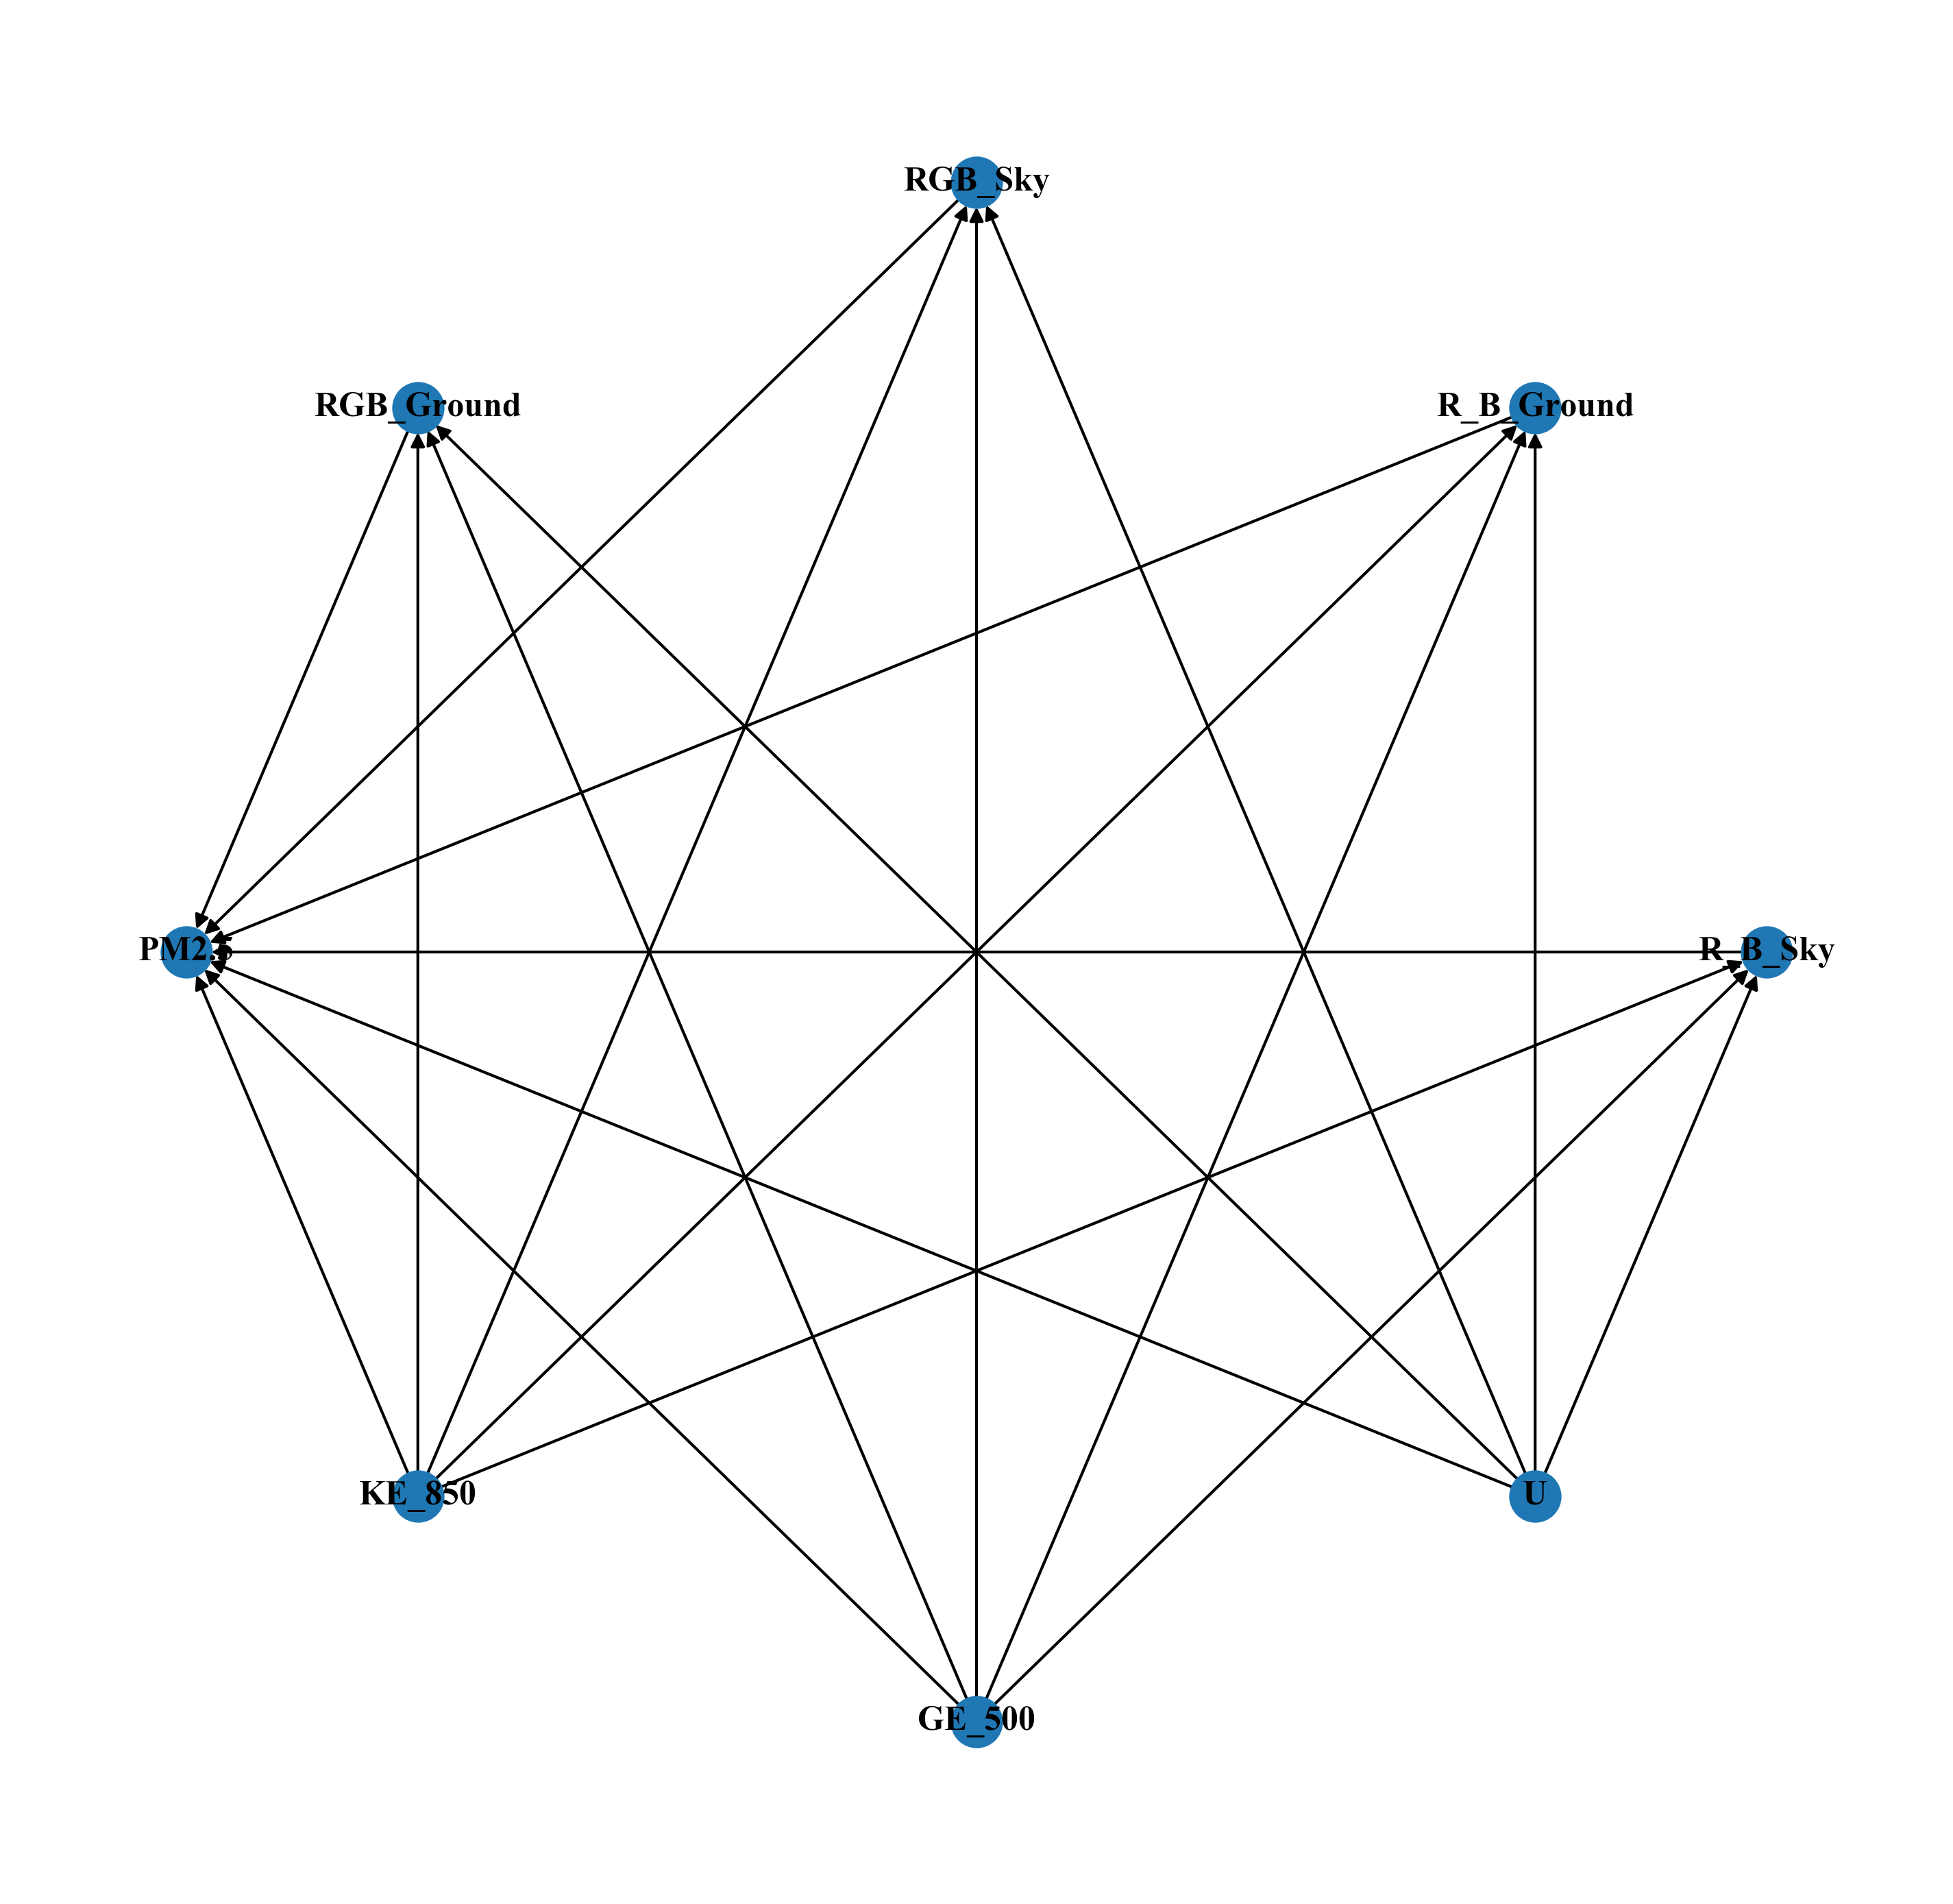

In [41]:
# 创建因果图
fig = plt.figure(figsize=(12,12),dpi= 300)
plt.subplot(111)
plt.tick_params(labelsize=32)

model=CausalModel(
        data = dict_["df"],
        treatment=dict_["treatment_name"],
        outcome=dict_["outcome_name"],
        common_causes=dict_["common_causes_names"],
        )
model.view_model()
from IPython.display import Image, display
#display(Image(filename="causal_model.png"))

# 打印原理公式
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

# 输出单变量控制
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))
CausalV=causal_estimate_reg.value*Y_range
print("Causal Effect is " + str(CausalV)+' µg/m3')

# 2. Nighttime Data, Y=PM2.5.

INFO:dowhy.do_why:Model to find the causal effect of treatment ['R_B_Sky', 'R_L_M', 'G_L_M', 'B_L_M'] on outcome ['PM2.5']
INFO:dowhy.causal_graph:Using Matplotlib for plotting


PM2.5    254.0
dtype: float64


INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'GE_500', 'KE_850']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: PM2.5~R_B_Sky+R_L_M+G_L_M+B_L_M+GE_500+KE_850


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                      
────────(Expectation(PM2.5|GE_500,KE_850))
dR_B_Sky                                  
Estimand assumption 1, Unconfoundedness: If U→R_B_Sky and U→PM2.5 then P(PM2.5|R_B_Sky,GE_500,KE_850,U) = P(PM2.5|R_B_Sky,GE_500,KE_850)
### Estimand : 2
Estimand name: iv
No such variable found!

*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                      
────────(Expectation(PM2.5|GE_500,KE_850))
dR_B_Sky                                  
Estimand assumption 1, Unconfoundedness: If U→R_B_Sky and U→PM2.5 then P(PM2.5|R_B_Sky,GE_500,KE_850,U) = P(PM2.5|R_B_Sky,GE_500,KE_850)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: PM2.5~R_B_Sky+R_L_M+G_L_M+B_L_M+GE_500+KE_850
## Estimate
Value: 0.17931720475496818

## Statistical Significance
p-va

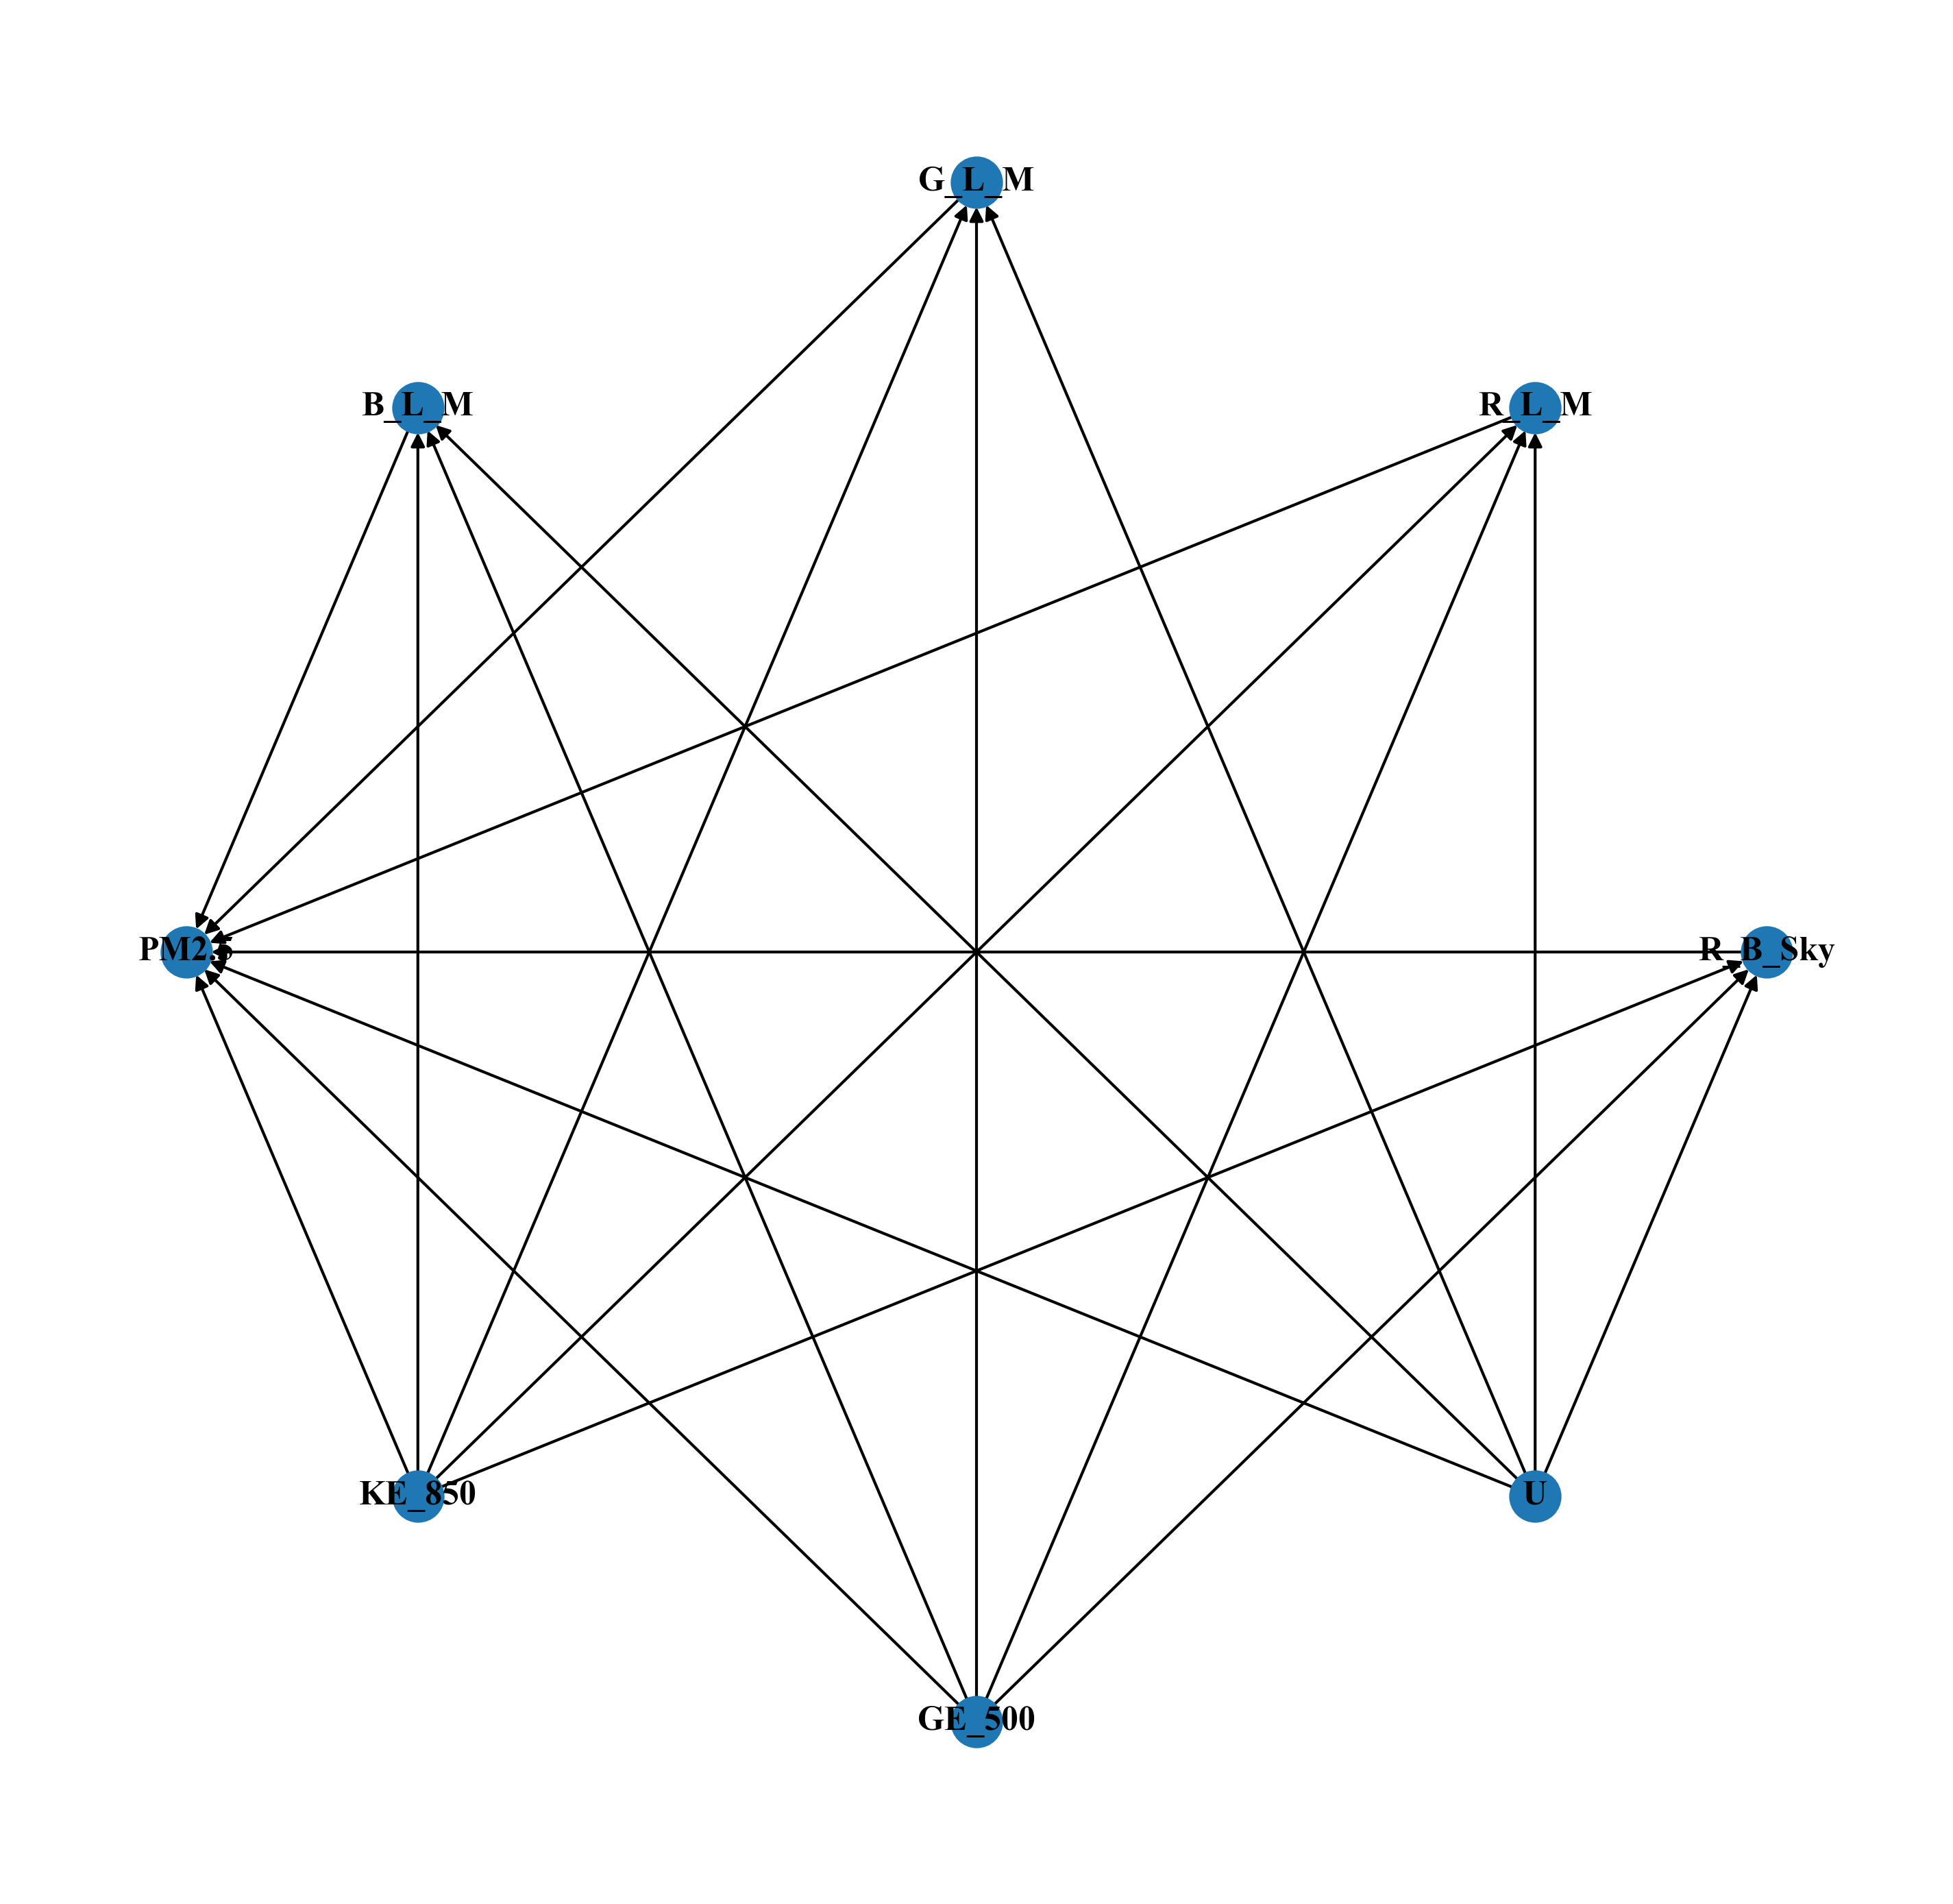

In [42]:
df=dfs1_night

y_cols= ['PM2.5']

x_cols=[
 'KE_850',
 'GE_500',
 'R_B_Sky',
 'R_L_M',
 'G_L_M',
 'B_L_M'   
]

X=df[x_cols]
y=df[y_cols]

Y_range=y.max()-y.min()

print(Y_range)

df=df.dropna()
df.drop(['Time'], axis=1, inplace=True)
dfn=df.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

dict_={}
dict_['df']=dfn
dict_['outcome_name']=y_cols
dict_['treatment_name']=[
 'R_B_Sky',
 'R_L_M',
 'G_L_M',
 'B_L_M'   
]
dict_['common_causes_names']=['KE_850','GE_500']

# 创建因果图
fig = plt.figure(figsize=(12,12),dpi= 300)
plt.subplot(111)
plt.tick_params(labelsize=32)

model=CausalModel(
        data = dict_["df"],
        treatment=dict_["treatment_name"],
        outcome=dict_["outcome_name"],
        common_causes=dict_["common_causes_names"],
        )
model.view_model()
from IPython.display import Image, display
#display(Image(filename="causal_model.png"))

# 打印原理公式
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

# 输出单变量控制
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))
CausalV=causal_estimate_reg.value*Y_range
print("Causal Effect is " + str(CausalV)+'mm')